In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pcos-diabetes/pcos-diagnosis.ipynb
/kaggle/input/pcos-diabetes/PCOS_infertility (1).csv


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [3]:
data = pd.read_csv('/kaggle/input/pcos-diabetes/PCOS_infertility (1).csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


In [5]:
data.shape

(541, 6)

In [6]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [7]:
data.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
AMH(ng/mL)                 object
dtype: object

In [8]:
data.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64

In [9]:
data["AMH(ng/mL)"].head()


0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [10]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,664.549235,238.229518
std,156.317519,156.317519,0.469615,3348.920576,1603.826221
min,1.000000,10001.000000,0.000000,1.300000,0.110417
25%,136.000000,10136.000000,0.000000,1.990000,1.990000
50%,271.000000,10271.000000,0.000000,20.000000,1.990000
75%,406.000000,10406.000000,1.000000,297.210000,97.630000
max,541.000000,10541.000000,1.000000,32460.970000,25000.000000


In [11]:
data.duplicated()
data = data.drop_duplicates()
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [12]:
data.head(10)


,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
5,6,10006,0,237.97,1.99,6.74
6,7,10007,0,1.99,1.99,3.05
7,8,10008,0,100.51,100.51,1.54
8,9,10009,0,1.99,1.99,1
9,10,10010,0,1.99,1.99,1.61


In [13]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of      Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0         1             10001           0                    1.99   
1         2             10002           0                   60.80   
2         3             10003           1                  494.08   
3         4             10004           0                    1.99   
4         5             10005           0                  801.45   
..      ...               ...         ...                     ...   
536     537             10537           0                    1.99   
537     538             10538           0                   80.13   
538     539             10539           0                    1.99   
539     540             10540           0                  292.92   
540     541             10541           1                    1.99   

     II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                      1.99       2.07  
1                      1.99       1.53  
2    

In [14]:
data.shape

(541, 6)

In [15]:
data.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
5,6,10006,0,237.97,1.99,6.74
6,7,10007,0,1.99,1.99,3.05
7,8,10008,0,100.51,100.51,1.54
8,9,10009,0,1.99,1.99,1
9,10,10010,0,1.99,1.99,1.61


In [16]:
data.drop(columns = ['Sl. No'], inplace = True )

In [17]:
data.head()

,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,10001,0,1.99,1.99,2.07
1,10002,0,60.80,1.99,1.53
2,10003,1,494.08,494.08,6.63
3,10004,0,1.99,1.99,1.22
4,10005,0,801.45,801.45,2.26


In [18]:
sns.set_style('darkgrid')

<Axes: ylabel='PCOS (Y/N)'>

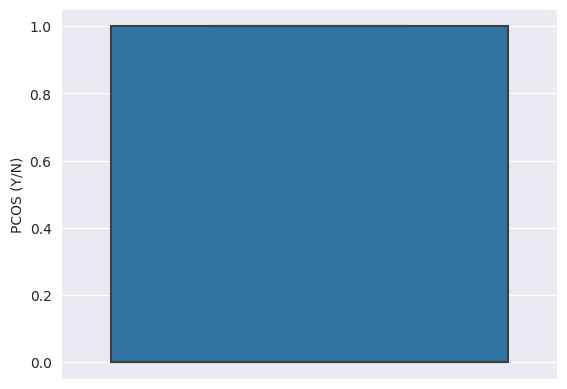

In [19]:
sns.boxplot(data , y = 'PCOS (Y/N)')